In [1]:
from keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

Using TensorFlow backend.


In [2]:
# 看資料的長相
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [3]:
# 顯示資料的標籤
labels = ["飛機", "汽車", "鳥", "貓", "鹿",
          "狗", "青蛙", "馬", "船", "卡車"]

飛機


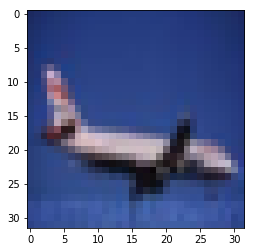

In [4]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0, 49999)
# 為何用labels[0]，因為labels原為list所以為了取出來要用[]才能取出
# print([y_train[c])
print(labels[y_train[c][0]])
plt.imshow(x_train[c])

In [5]:
# 經驗科學:要多少filter(捲積)---抄取別人架構


In [6]:
# 進卷積
x_train_shape = x_train / 255
x_test_shape = x_test / 255
# y進去的時候要one-hot encoding 3 -> [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
y_train_cat[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [13]:
from keras.models import Sequential
# Conv2D = 捲積 ,  MaxPool2D = 池化
from keras.layers import Conv2D, MaxPooling2D, Dense
# reshape = Flatten 平坦層
from keras.layers import Flatten
# cnn 為模型
cnn = Sequential()
# filter=多少濾器(32) , kernael_size=捲積盒=(3,3),padding = 改布

# 格子 * W * filter = 864 (每個filter配上一個bias因為有ativation所以多32個)
# 9 * 3(RGB) * 32(filters) + 32(bias) 
cnn.add(Conv2D(32, (3,3),
               activation = "relu",
               padding="same",
               input_shape =(32,32,3)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
# 9 * 32(上一層特徵數目) * 64 + 64 = 18496 
cnn.add(Conv2D(64, (3,3),
               activation = "relu",
               padding="same"))
cnn.add(MaxPooling2D(pool_size=(2,2)))
# 9 * 32(上一層特徵數目) * 64 + 64 = 18496 
               
cnn.add(Conv2D(128, (3,3),
               activation = "relu",
               padding="same"))    
cnn.add(MaxPooling2D(pool_size=(2,2)))
               
# MlP(大腦)
cnn.add(Flatten())
cnn.add(Dense(256, activation="relu"))
cnn.add(Dense(10, activation="softmax"))
cnn.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
__________

In [16]:
cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [19]:
# validation_split = 
cnn.fit(x_train_shape, y_train_cat, batch_size=200, epochs= 10, validation_split= 0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 63s 1ms/step - loss: 1.5011 - acc: 0.4594 - val_loss: 1.3166 - val_acc: 0.5300
Epoch 2/10
45000/45000 [==============================] - 63s 1ms/step - loss: 1.1834 - acc: 0.5787 - val_loss: 1.0957 - val_acc: 0.6192
Epoch 3/10
45000/45000 [==============================] - 62s 1ms/step - loss: 1.0088 - acc: 0.6480 - val_loss: 0.9622 - val_acc: 0.6658
Epoch 4/10
45000/45000 [==============================] - 63s 1ms/step - loss: 0.8971 - acc: 0.6886 - val_loss: 0.9161 - val_acc: 0.6810
Epoch 5/10
45000/45000 [==============================] - 64s 1ms/step - loss: 0.8070 - acc: 0.7199 - val_loss: 0.8711 - val_acc: 0.6994
Epoch 6/10
45000/45000 [==============================] - 65s 1ms/step - loss: 0.7392 - acc: 0.7433 - val_loss: 0.8084 - val_acc: 0.7198
Epoch 7/10
45000/45000 [==============================] - 65s 1ms/step - loss: 0.6726 - acc: 0.7682 - val_loss: 0.8306 - val_acc:

In [20]:
cnn.evaluate(x_test_shape, y_test_cat)

10000/10000 [==============================] - 6s 562us/step


[0.8005273641586304, 0.7345]

In [21]:
# hdf5 格式(hdf viewer)
# 下載相對版本

In [24]:
#如何儲存模型
cnn.save("simplecnn.h5")

In [26]:
# 要用模型時
from keras.models import load_model
old = load_model("simplecnn.h5")
old.evaluate(x_test_shape, y_test_cat)
# 可在上方加上Dropout來防治過擬合
# import Dropout , cnn.add(Dropout(0.25))

10000/10000 [==============================] - 6s 649us/step


[0.8005273641586304, 0.7345]

In [ ]:
# colb 不同

In [27]:
from sklearn.metrics import confusion_matrix
import pandas as pd
pd.DataFrame(confusion_matrix(y_test, cnn.predict_classes(x_test_shape)))

,0,1,2,3,4,5,6,7,8,9
0,780,26,35,13,23,14,10,10,37,52
1,10,840,3,6,1,3,2,1,16,118
2,56,3,581,64,110,69,37,46,8,26
3,21,13,50,485,97,189,49,44,12,40
4,21,4,43,37,738,35,26,81,8,7
5,9,4,47,106,59,680,10,52,10,23
6,2,9,38,62,54,33,766,8,8,20
7,12,5,16,22,57,59,7,792,2,28
8,60,35,11,7,4,6,2,5,819,51
9,27,54,6,8,4,11,3,9,14,864


In [28]:
labels

['飛機', '汽車', '鳥', '貓', '鹿', '狗', '青蛙', '馬', '船', '卡車']